In [254]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set(rc={'figure.figsize':(11,8)})
import matplotlib.pyplot as plt

In [255]:
# read the data
fremont=pd.read_excel('Fremont1.xlsx',index_col=False)
sfo=pd.read_excel('sfo1.xlsx',index_col=False)
oakland=pd.read_excel('oakland1.xlsx',index_col=False)

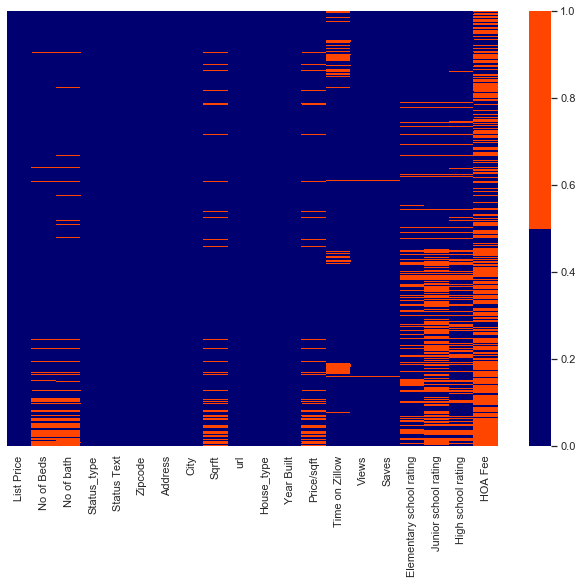

In [256]:
df1=fremont.copy()
df1=df1.append(sfo)
df1=df1.append(oakland)

cols=df1.columns[:22] 
colours=['#000070','#ff4500']
fig=plt.figure()

sns.heatmap(df1[cols].isnull(),cmap=sns.color_palette(colours),yticklabels=False)
#fremont 1-174
#sfo 175-973
#oakland 974-1773

In [257]:
# % of records not available/null at zillow.
for col in df1.columns:
    pct_missing=np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

List Price - 0.0%
No of Beds - 9.0%
No of bath - 10.0%
Status_type - 0.0%
Status Text - 0.0%
Zipcode - 0.0%
Address - 0.0%
City - 0.0%
Sqrft - 10.0%
url - 0.0%
House_type - 0.0%
Year Built - 0.0%
Price/sqft - 10.0%
Time on Zillow - 11.0%
Views - 2.0%
Saves - 2.0%
Elementary school rating - 16.0%
Junior school rating - 28.0%
High school rating - 20.0%
HOA Fee - 59.0%


In [258]:
#fill all the empty cells with 0 for column sqrft & then drop those rows
fremont['Sqrft']=fremont['Sqrft'].fillna(0)
#removing all rows with 0 values in sqrft in oakland
fremont= fremont[fremont['Sqrft'] != 0]
print(fremont.shape)

(164, 20)


In [259]:
#fill all the empty cells with 0
sfo['Sqrft']=sfo['Sqrft'].fillna(0)
#removing all rows with 0 values in sqrft in oakland
sfo= sfo[sfo['Sqrft'] != 0]
print(sfo.shape)
sfo.isnull().sum()

(735, 20)


List Price                    0
No of Beds                    7
No of bath                   23
Status_type                   0
Status Text                   0
Zipcode                       0
Address                       0
City                          0
Sqrft                         0
url                           0
House_type                    0
Year Built                    0
Price/sqft                    0
Time on Zillow               56
Views                        15
Saves                        15
Elementary school rating     51
Junior school rating         49
High school rating           82
HOA Fee                     341
dtype: int64

In [260]:
#np.mean(sfo['Elementary school rating'])=5.688
sfo['Elementary school rating']=sfo['Elementary school rating'].fillna(np.mean(sfo['Elementary school rating']))
#np.mean(sfo['Junior school rating'])=5.325737265415553
sfo['Junior school rating']=sfo['Junior school rating'].fillna(np.mean(sfo['Junior school rating']))
#np.mean(sfo['High school rating'])=5.267605633802813
sfo['High school rating']=sfo['High school rating'].fillna(np.mean(sfo['High school rating']))

In [261]:
#fill all the empty cells with 0
oakland['Sqrft']=oakland['Sqrft'].fillna(0)

In [262]:
#removing all rows with 0 values in sqrft in oakland
oakland= oakland[oakland['Sqrft'] != 0]
print(oakland.shape)

(689, 20)


In [263]:
#np.mean(oakland['Elementary school rating'])=4.106007067137821
oakland['Elementary school rating']=oakland['Elementary school rating'].fillna(np.mean(oakland['Elementary school rating']))
#np.mean(oakland['Junior school rating'])=3.3937677053824316
oakland['Junior school rating']=oakland['Junior school rating'].fillna(np.mean(oakland['Junior school rating']))
#np.mean(oakland['High school rating'])=3.2425373134328463
oakland['High school rating']=oakland['High school rating'].fillna(np.mean(oakland['High school rating']))

In [264]:
fremont['HOA Fee']=fremont['HOA Fee'].str.replace('$','').str.replace(',','').astype(float)
#fremont['HOA Fee']=fremont['HOA Fee'].fillna(np.mean(fremont['HOA Fee']))
fremont['HOA Fee']=fremont['HOA Fee'].fillna(0)

In [265]:
sfo['HOA Fee']=sfo['HOA Fee'].str.replace('$','').str.replace(',','').astype(float)
#sfo['HOA Fee']=sfo['HOA Fee'].fillna(np.mean(sfo['HOA Fee']))
sfo['HOA Fee']=sfo['HOA Fee'].fillna(0)

In [266]:
oakland['HOA Fee']=oakland['HOA Fee'].str.replace('$','').str.replace(',','').astype(float)
#oakland['HOA Fee']=oakland['HOA Fee'].fillna(np.mean(oakland['HOA Fee']))
oakland['HOA Fee']=oakland['HOA Fee'].fillna(0)

In [267]:
# No of bed
# In fremont there is no null values in # of bed
#in sfo No of bed =0 represents less sqrft
#in sfo No of bed =null represents Lot/Multifamily residence
#so replace null with Not applicable/0 in SFO
sfo['No of Beds']=sfo['No of Beds'].fillna(0)
#oakland.loc[oakland['No of Beds'].isnull()]
# Null values in # of bed belongs to Quadruplex,Duplex,multifamily,triplex
#lets replace those with 'Not Applicable'/0
oakland['No of Beds']=oakland['No of Beds'].fillna(0)

In [268]:
#sfo.isnull().sum()
#except one row in S.No 170, 412,546(Condominium), --> manually checked and updated values
#all the otehr houses are Duplex,Triplex, Single family residence,multi family residence, mixed use
sfo.loc[sfo['No of bath'].isnull()]
sfo['No of bath']=sfo['No of bath'].fillna(0)

oakland.loc[oakland['No of bath'].isnull()]
oakland['No of bath']=oakland['No of bath'].fillna(0)

In [269]:
#time on zillow null values to 1
fremont['Time on Zillow']=fremont['Time on Zillow'].fillna(1)
sfo['Time on Zillow']=sfo['Time on Zillow'].fillna(1)
oakland['Time on Zillow']=oakland['Time on Zillow'].fillna(1)


In [270]:
fremont['Views']=fremont['Views'].fillna(0)
sfo['Views']=sfo['Views'].fillna(0)
oakland['Views']=oakland['Views'].fillna(0)

In [271]:
fremont['Saves']=fremont['Saves'].fillna(0)
sfo['Saves']=sfo['Saves'].fillna(0)
oakland['Saves']=oakland['Saves'].fillna(0)

In [272]:
fremont['Year Built'][fremont['Year Built']=='No Data']=np.nan
sfo['Year Built'][sfo['Year Built']=='No Data']=np.nan
oakland['Year Built'][oakland['Year Built']=='No Data']=np.nan

C:\Users\tempt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tempt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tempt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [273]:
fremont['Year Built']=fremont['Year Built'].astype(float)
sfo['Year Built']=sfo['Year Built'].astype(float)
oakland['Year Built']=oakland['Year Built'].astype(float)

In [274]:
print(oakland[oakland['Year Built']==0]['Year Built'].count())
print(fremont[fremont['Year Built']==0]['Year Built'].count())
print(sfo[sfo['Year Built']==0]['Year Built'].count())
#sfo: 7 rows with year built missing

0
0
7


In [275]:
sfo['Year Built'][sfo['Year Built']==0]=np.nan

C:\Users\tempt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [276]:
sfo['Year Built']=sfo['Year Built'].fillna(np.mean(sfo['Year Built']))
fremont['Year Built']=fremont['Year Built'].fillna(np.mean(fremont['Year Built']))
oakland['Year Built']=oakland['Year Built'].fillna(np.mean(oakland['Year Built']))

In [277]:
fremont['List Price']=fremont['List Price'].str.replace('$','').str.replace(',','').str.replace('+','').astype(float)
sfo['List Price']=sfo['List Price'].str.replace('$','').str.replace(',','').str.replace('+','').astype(float)
oakland['List Price']=oakland['List Price'].str.replace('$','').str.replace(',','').str.replace('+','').astype(float)

In [278]:
fremont['Price/sqft']=fremont['Price/sqft'].str.replace('$','').str.replace(',','').astype(float).astype(int)
sfo['Price/sqft']=sfo['Price/sqft'].str.replace('$','').str.replace(',','').astype(float).astype(int)
oakland['Price/sqft']=oakland['Price/sqft'].str.replace('$','').str.replace(',','').astype(float).astype(int)

In [279]:
# S.No 380, List price converted into NaN for unknown reason. We are converting it back to its original value ($700,000)
print(sfo[sfo['List Price'].isnull()])
sfo['List Price']=sfo['List Price'].fillna(700000)

     List Price  No of Beds  No of bath Status_type Status Text  Zipcode  \
379         NaN         4.0         5.0    FOR_SALE     Auction    94127   

                                          Address           City   Sqrft  \
379  250 Santa Paula Ave, San Francisco, CA 94127  San Francisco  3172.0   

                                                   url  \
379  https://www.zillow.com/homedetails/250-Santa-P...   

                  House_type  Year Built  Price/sqft  Time on Zillow  Views  \
379  Single Family Residence      1926.0        1323            21.0  2,894   

     Saves  Elementary school rating  Junior school rating  \
379   42.0                       8.0                   4.0   

     High school rating  HOA Fee  
379                 6.0      0.0  


# combine cleaned data

In [281]:
df=fremont.copy()
print(df.shape)
df=df.append(sfo)
print(df.shape)
df=df.append(oakland)
df.shape

(164, 20)
(899, 20)


(1588, 20)

In [282]:
df.dtypes

List Price                  float64
No of Beds                  float64
No of bath                  float64
Status_type                  object
Status Text                  object
Zipcode                       int64
Address                      object
City                         object
Sqrft                       float64
url                          object
House_type                   object
Year Built                  float64
Price/sqft                    int32
Time on Zillow              float64
Views                        object
Saves                       float64
Elementary school rating    float64
Junior school rating        float64
High school rating          float64
HOA Fee                     float64
dtype: object

In [283]:
df['List Price']=df['List Price'].astype(int)
df['HOA Fee']=df['HOA Fee'].astype(int)
df['Elementary school rating']=df['Elementary school rating'].astype(int)
df['Junior school rating']=df['Junior school rating'].astype(int)
df['Elementary school rating']=df['Elementary school rating'].astype(int)
df['Views']=df['Views'].str.replace(',','').astype(float)


In [284]:
df['Views']=df['Views'].fillna(0).astype(int)

# CATEGORICAL VS NUMERIC DATA

In [285]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['List Price' 'No of Beds' 'No of bath' 'Zipcode' 'Sqrft' 'Year Built'
 'Price/sqft' 'Time on Zillow' 'Views' 'Saves' 'Elementary school rating'
 'Junior school rating' 'High school rating' 'HOA Fee']


In [286]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Status_type' 'Status Text' 'Address' 'City' 'url' 'House_type']


In [287]:
categorical_data=['No of Beds','No of bath','Status_type','Status Text','Zipcode','City','House_type']
for i in categorical_data:
    df[i].astype('category')

In [381]:
print(df.isnull().sum())
df.head()

List Price                  0
No of Beds                  0
No of bath                  0
Sqrft                       0
Year Built                  0
Price/sqft                  0
Time on Zillow              0
Views                       0
Saves                       0
Elementary school rating    0
Junior school rating        0
High school rating          0
HOA Fee                     0
City_Berkeley               0
City_Emeryville             0
City_Fremont                0
City_Oakland                0
City_Piedmont               0
City_San Francisco          0
dtype: int64


,List Price,No of Beds,No of bath,Sqrft,Year Built,Price/sqft,Time on Zillow,Views,Saves,Elementary school rating,Junior school rating,High school rating,HOA Fee,City_Berkeley,City_Emeryville,City_Fremont,City_Oakland,City_Piedmont,City_San Francisco
0,898000,3,1.0,950,1953.0,945,2,837,36,8,6,7.0,0,0,0,1,0,0,0
1,2580000,4,5.0,3499,2019.0,737,3,1512,62,8,9,9.0,238,0,0,1,0,0,0
2,1399000,3,3.0,1544,1963.0,906,1,653,42,10,7,8.0,0,0,0,1,0,0,0
3,849800,3,1.0,950,1955.0,895,1,636,24,5,6,7.0,0,0,0,1,0,0,0
4,1442000,3,3.0,1609,1955.0,896,1,817,42,7,7,8.0,0,0,0,1,0,0,0


# Export data

In [289]:
writer=pd.ExcelWriter('cleaned.xlsx')
df.to_excel(writer,'sheet1')
writer.save()

In [317]:
result=pd.read_excel('cleaned.xlsx',index_col=False)


In [291]:
writer=pd.ExcelWriter('fremont_clean.xlsx')
df[:164].to_excel(writer,'sheet1')
writer.save()

writer=pd.ExcelWriter('sfo_clean.xlsx')
df[164:899].to_excel(writer,'sheet1')
writer.save()

writer=pd.ExcelWriter('oakland_clean.xlsx')
df[899:].to_excel(writer,'sheet1')
writer.save()



# DATA VISUALIZATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

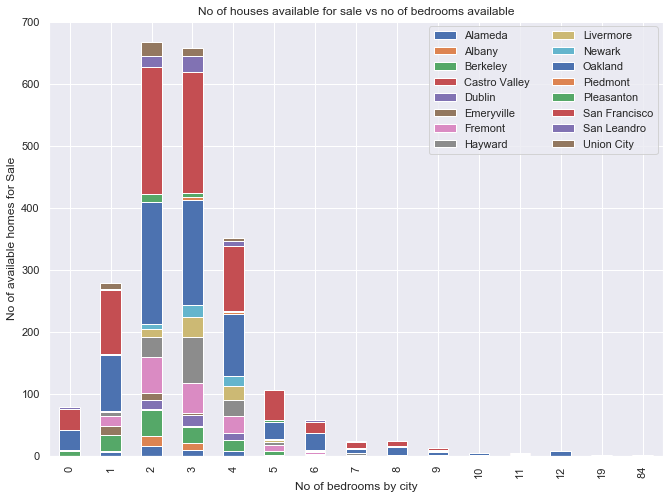

In [352]:
# we can check on consolidated dataset too
dataframe1 = pd.read_excel('Consolidated1.xlsx') 
#dataframe1 = pd.read_excel('Consolidated.xlsx') 
df_pivot = pd.pivot_table(dataframe1, index='No of Beds', columns='City', values='List Price', aggfunc='count')
df_pivot.plot.bar(stacked=True)
plt.legend(loc="upper right", bbox_to_anchor=(1, 1), ncol=2)
plt.title('No of houses available for sale vs no of bedrooms available')
plt.xlabel('No of bedrooms by city')
plt.ylabel('No of available homes for Sale')
plt.show()

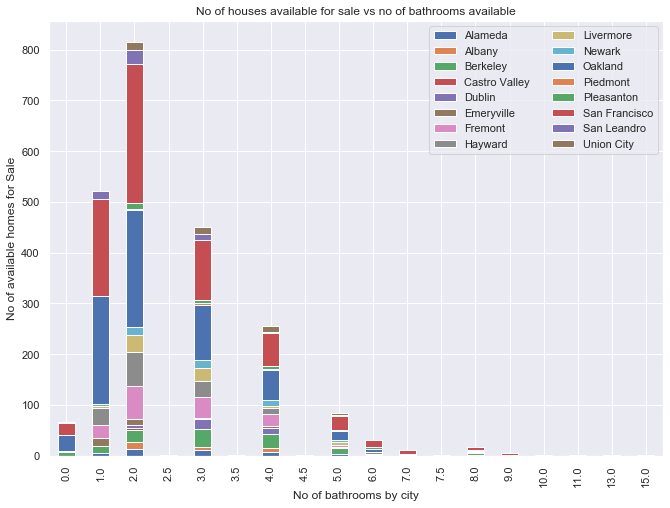

In [353]:
#No of houses available for sale vs #of bath city wise
df_pivot = pd.pivot_table(dataframe1, index='No of bath', columns='City', values='List Price', aggfunc='count')
df_pivot.plot.bar(stacked=True)
plt.legend(loc="upper right", bbox_to_anchor=(1, 1), ncol=2)
plt.title('No of houses available for sale vs no of bathrooms available')
plt.xlabel('No of bathrooms by city')
plt.ylabel('No of available homes for Sale')
plt.show()

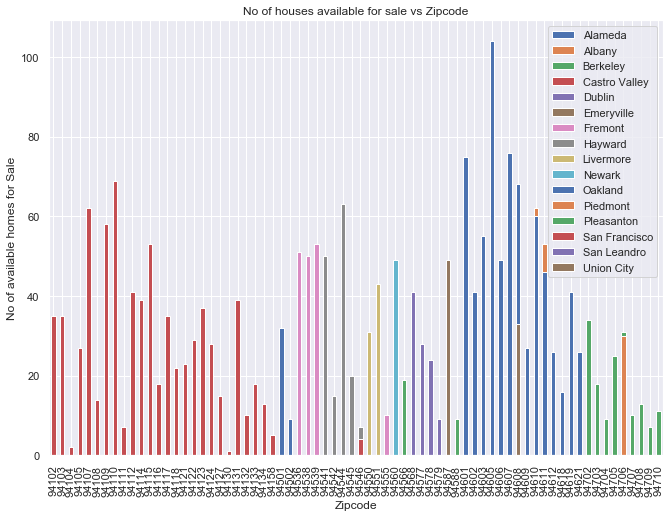

In [354]:
#No of houses available for sale vs zipcode
df_pivot = pd.pivot_table(dataframe1, index='Zipcode', columns='City', values='List Price', aggfunc='count')
df_pivot.plot.bar(stacked=True)
plt.title('No of houses available for sale vs Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('No of available homes for Sale')
plt.legend(loc='best')
#plt.show()
#observation: 
#we have more houses available for sales in zipcode: 94605 which belongs to oakland
#in SFO, we have more houses for sale in zipcode 94110
#in Fremont, Houses for sales is almost equally distributed in zipcodes 94536 ,94538 &  94539   

In [355]:
no_of_beds=[]
for amount in dataframe1['No of Beds']:
    if int(amount)>=10:
        no_of_beds.append('10+')
    else:
        no_of_beds.append(str(amount))
no_of_beds=pd.Series(no_of_beds)

ticks=np.arange(0,11)
ticks=ticks.astype('str')
for idx, tick in enumerate(ticks):
    ticks[idx] = str(tick)
ticks[-1]='10+'

value_counts=no_of_beds.value_counts()
value_counts=value_counts.reindex(ticks)

Text(0, 0.5, 'Number of Houses')

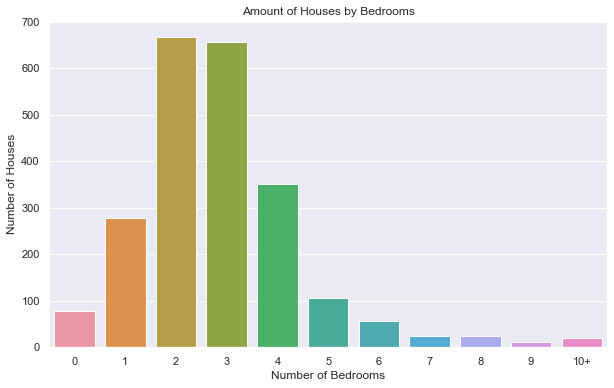

In [356]:
plt.figure(figsize=(10,6))
sns.barplot(x=ticks, y=value_counts)
plt.title('Amount of Houses by Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses')

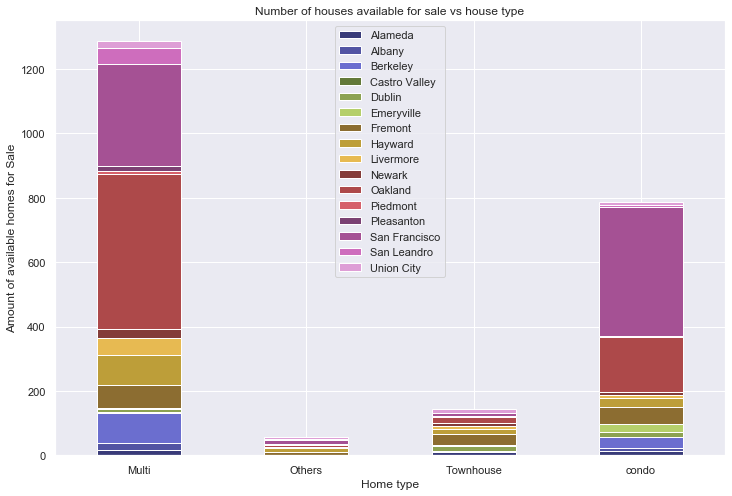

In [357]:
temp=pd.DataFrame(columns=['House_type','City','List Price'])
temp['House_type']=dataframe1['House_type']
temp['City']=dataframe1['City']
temp['List Price']=dataframe1['List Price']
temp['House_type']=temp['House_type'].astype(str)

for idx, value in enumerate(temp['House_type']):
    if value.upper()[:5]=='CONDO' or value.upper()[:4]=='LOFT':
        temp.iloc[idx,0]='condo'
    elif value.upper()[:4]=='TOWN':
        temp.iloc[idx,0]='Townhouse'
    elif value=='Detached' or value.upper()=='QUADRUPLEX' or value.upper()=='DUPLEX' or value.upper()=='TRIPLEX':
        temp.iloc[idx,0]='Multi'
    elif value.upper()[:6]=='SINGLE' or value.upper()[:5]=='MULTI' or value.upper()[:5]=='STOCK':
        temp.iloc[idx,0]='Multi'
    else:
        temp.iloc[idx,0]='Others'

data_pivot=pd.pivot_table(temp, index='House_type', columns='City', values='List Price', aggfunc='count')
data_pivot.fillna(0, inplace=True)
data_pivot.plot.bar(stacked=True, figsize=(12,8), rot=0, colormap='tab20b')
plt.title('Number of houses available for sale vs house type')
plt.xlabel('Home type')
plt.ylabel('Amount of available homes for Sale')
plt.legend(loc='upper center')
plt.show()

In [358]:
oak=pd.read_excel('oakland_clean.xlsx', index_col=0)
sf=pd.read_excel('sfo_clean.xlsx', index_col=0)

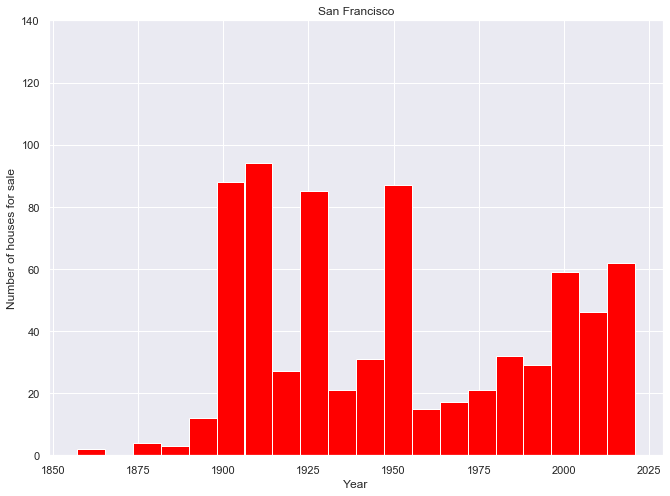

In [359]:
plt.hist(sf['Year Built'],bins=20, color='red')
plt.title('San Francisco')
plt.ylabel('Number of houses for sale')
plt.ylim([0,140]) # same scale as next graph to more easily compare the two
plt.xlabel('Year')
plt.show()

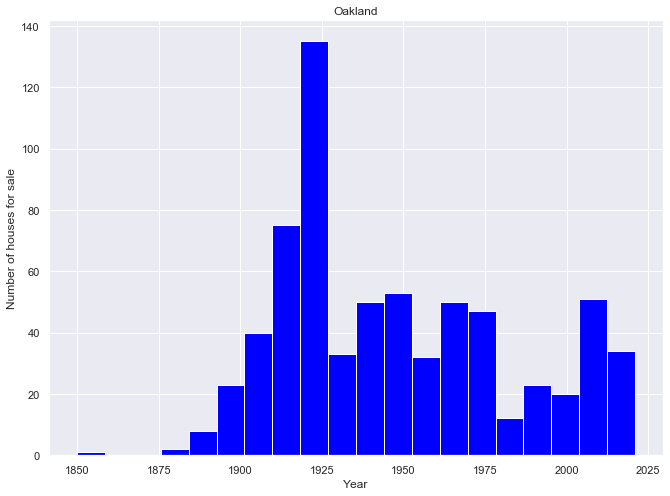

In [360]:
plt.hist(oak['Year Built'],bins=20, color='blue')
plt.title('Oakland')
plt.ylabel('Number of houses for sale')
plt.xlabel('Year')
plt.show()

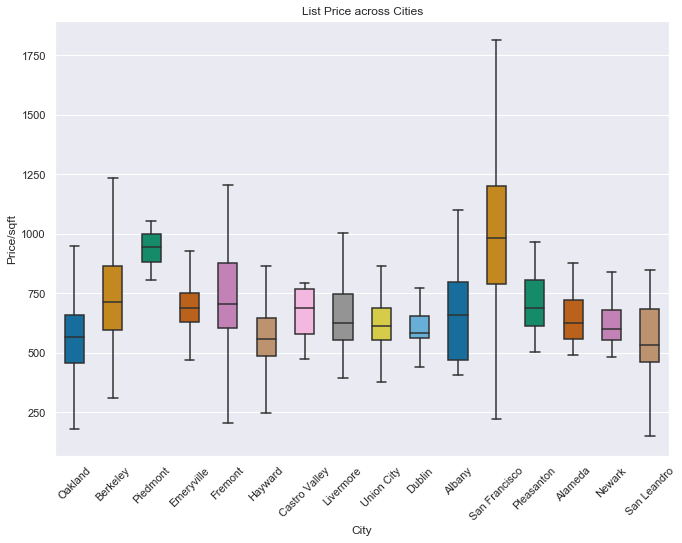

In [361]:
bplot=sns.boxplot(y='Price/sqft', x='City', 
                 data=dataframe1, 
                 width=0.5,
                 palette="colorblind",showfliers=False)
bplot.tick_params(axis='x', rotation=45)
bplot.ticklabel_format(axis='y', style='plain', useOffset=False)
bplot.set_title('List Price across Cities')

plt.show()

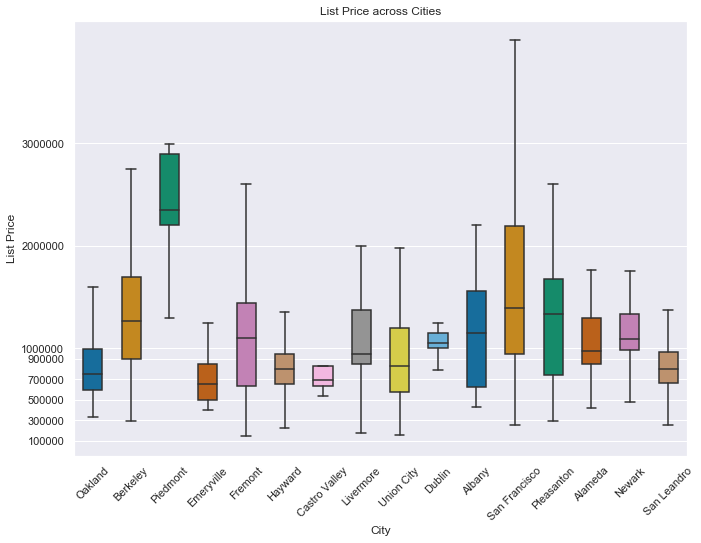

In [362]:
bplot=sns.boxplot(y='List Price', x='City', 
                 data=dataframe1, 
                 width=0.5,
                 palette="colorblind",showfliers=False)

bplot.set_yticks([100000,300000,500000,700000,900000,1000000,2000000,3000000])
bplot.tick_params(axis='x', rotation=45)
bplot.ticklabel_format(axis='y', style='plain', useOffset=False)
bplot.set_title('List Price across Cities')
plt.show()

In [363]:
df=pd.read_excel('Consolidated1.xlsx')
c=df['City'].unique()
records=dict()
for i in c:
    records[i]=len(df[df['City'] == i])   
print(records)

{'Oakland': 677, 'Berkeley': 128, 'Piedmont': 9, 'Emeryville': 33, 'Fremont': 164, 'Hayward': 151, 'Castro Valley': 4, 'Livermore': 74, 'Union City': 49, 'Dublin': 41, 'Albany': 30, 'San Francisco': 735, 'Pleasanton': 28, 'Alameda': 41, 'Newark': 49, 'San Leandro': 61}


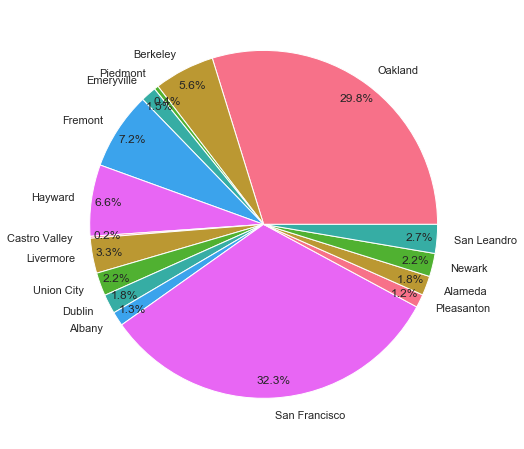

In [364]:
#define data
data = records.values()
labels = records.keys()
colors = sns.color_palette('husl')[0:16]
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%',pctdistance = 0.9)
plt.show()

# Regression

In [365]:
dataset=pd.read_excel('cleaned.xlsx',index_col=False,usecols=['List Price','No of Beds','No of bath','Sqrft','Year Built','Price/sqft','Time on Zillow','Views','Saves','Elementary school rating','Junior school rating','High school rating','HOA Fee','City'])
dataset.head()

,List Price,No of Beds,No of bath,City,Sqrft,Year Built,Price/sqft,Time on Zillow,Views,Saves,Elementary school rating,Junior school rating,High school rating,HOA Fee
0,898000,3,1.0,Fremont,950,1953.0,945,2,837,36,8,6,7.0,0
1,2580000,4,5.0,Fremont,3499,2019.0,737,3,1512,62,8,9,9.0,238
2,1399000,3,3.0,Fremont,1544,1963.0,906,1,653,42,10,7,8.0,0
3,849800,3,1.0,Fremont,950,1955.0,895,1,636,24,5,6,7.0,0
4,1442000,3,3.0,Fremont,1609,1955.0,896,1,817,42,7,7,8.0,0


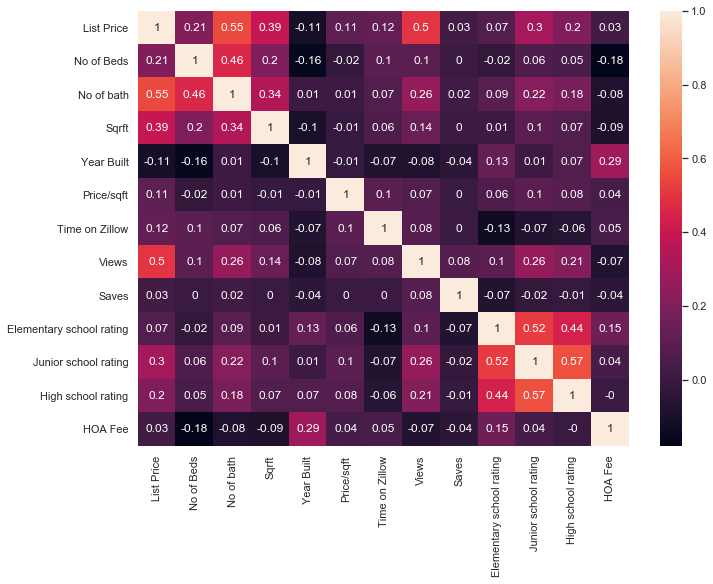

In [366]:
correlation_matrix=dataset.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)
# Observation: we see some correlation between List price and ( No of bath, sqrft,Views). 

In [ ]:
#create dummies for categorical variable( City)

In [368]:
df = pd.get_dummies(dataset, columns=['City'])

In [369]:
df.columns

Index(['List Price', 'No of Beds', 'No of bath', 'Sqrft', 'Year Built',
       'Price/sqft', 'Time on Zillow', 'Views', 'Saves',
       'Elementary school rating', 'Junior school rating',
       'High school rating', 'HOA Fee', 'City_Berkeley', 'City_Emeryville',
       'City_Fremont', 'City_Oakland', 'City_Piedmont', 'City_San Francisco'],
      dtype='object')

In [ ]:
#Exploratory data analysis

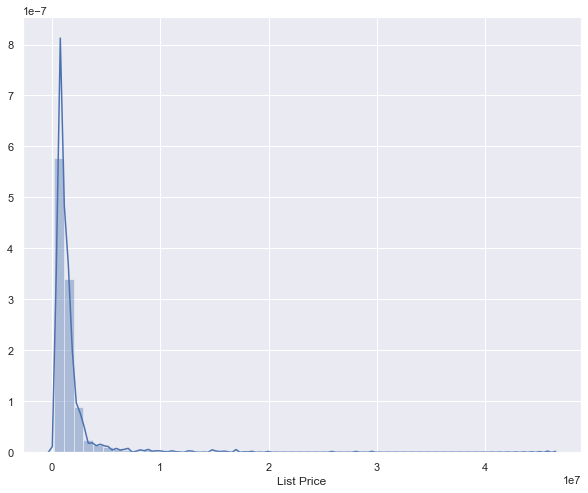

In [370]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(df['List Price'], bins=50)
plt.show()

In [ ]:
#Observation: we see a lot of outliers which belong to sfo

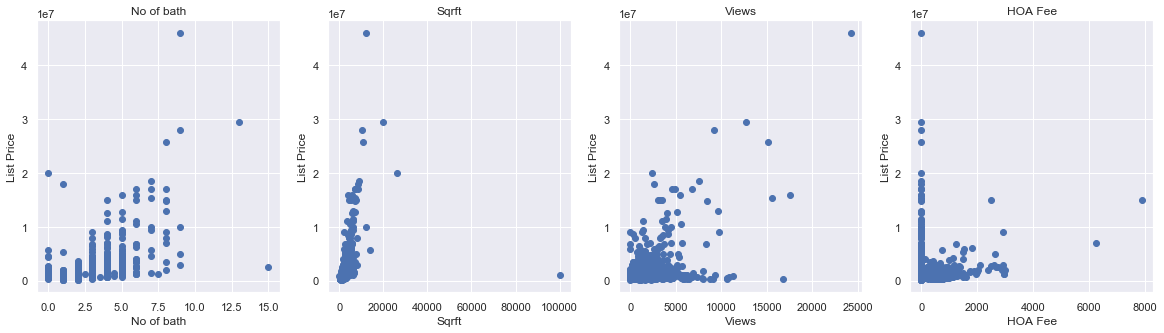

In [371]:
plt.figure(figsize=(20, 5))
features = ['No of bath', 'Sqrft','Views','HOA Fee']
target = df['List Price']

for index,column in enumerate(features):
    plt.subplot(1,len(features),index+1)
    x=df[column]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('List Price')

In [372]:
#as we included multiple cities with extreme price range(eg sfo vs oakland), we can observe the difference in list price for the same bath type

In [373]:
X=pd.DataFrame(np.c_[df['No of bath'],df['Sqrft'],df['Views'],df['City_San Francisco'],df['City_Oakland']],columns=['No of bath','Sqrft','Views','City_San Francisco','City_Oakland'])
#X=pd.DataFrame(np.c_[df['No of bath'],df['Sqrft'],df['Views']],columns=['No of bath','Sqrft','Views'])
Y=df['List Price']                     

In [ ]:
#Train & test data

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1270, 5)
(318, 5)
(1270,)
(318,)


In [376]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [377]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1779353.7142479783
R2 score is 0.5332493512507968




In [378]:
# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 1855417.0803512237
R2 score is 0.23935618249489432


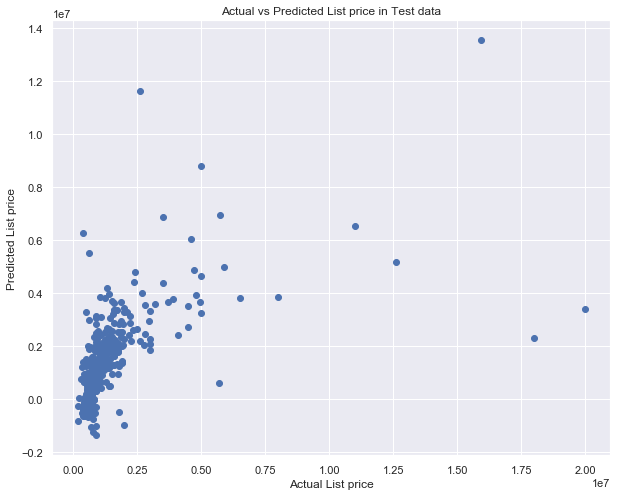

In [379]:
# plotting the y_test vs y_pred
plt.scatter(Y_test, y_test_predict)
plt.xlabel('Actual List price')
plt.ylabel('Predicted List price')
plt.title('Actual vs Predicted List price in Test data')
plt.show()

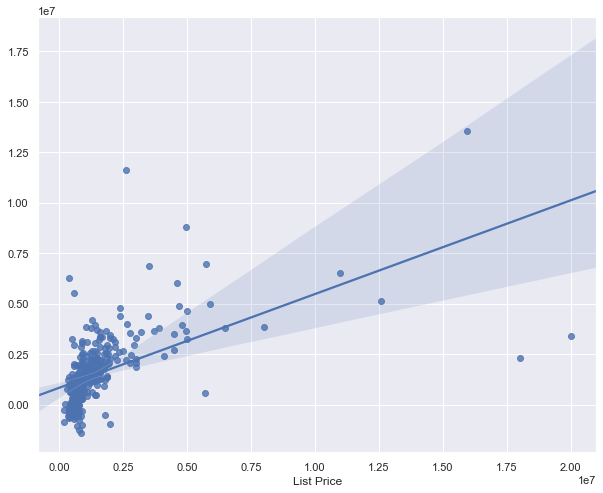

In [380]:
sns.regplot(Y_test, y_test_predict)

In [ ]:
#Observation:
#dataset included only houses available for sales in oakland,fremont & san francisco
# if we include just the nearby cities , our accuracy may further improve 